In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy import units as u
from astropy import coordinates as coord
from astropy.utils.data import get_pkg_data_filename

#### Units

In [2]:
# Specify the unit by multiplying
E = 10 * u.TeV
E

<Quantity 10. TeV>

In [3]:
# Get the particular value or unit
print('value: ', E.value)
print('unit: ', E.unit)

value:  10.0
unit:  TeV


In [4]:
# It is also possible to add a unit to arrays
Energies = np.array([10,30,42]) * u.Joule
Energies[0]

<Quantity 10. J>

In [5]:
# The units can be converted
dist = 1.0 * u.parsec
dist.to(u.km)

<Quantity 3.08567758e+13 km>

In [6]:
# Caluclations with units
mass = 100000 * u.g
accel = 10.0 * u.meter / u.second**2
force = mass * accel
print(force)
print(force.to(u.Newton))

1000000.0 g m / s2
1000.0 N


In [7]:
# Units may cancel out
no_dim = 42 * u.kg / u.kg
print(no_dim)
print(no_dim.unit)

42.0



In [8]:
# Special units like magnitudes, dB etc (they are logartihmic)
-2.5 * u.mag(u.ct / u.s)

<Magnitude -2.5 mag(ct / s)>

#### Coordinates

In [9]:
# Define a coordinate
c = coord.SkyCoord(ra=23.47658*u.deg, dec=01.15342*u.deg, frame='fk5')
c

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (23.47658, 1.15342)>

In [10]:
coord.SkyCoord?

In [11]:
# Transform the coordinate in Galactic coordinates
c.galactic

<SkyCoord (Galactic): (l, b) in deg
    (144.50046743, -59.92793389)>

Also pixel coordinates can be transformed to sky coordinates, but therefore a so-called header is needed, which describes the experiment / measurement setup. We'll see that later.

In [12]:
# Define other coordinates
# Specify the units either directly with the value or as a separate statement
c1 = coord.SkyCoord('23 47 09.10 +01 15 08.56', unit=(u.hourangle, u.deg))
c2 = coord.SkyCoord('23h47m09.10s', '+01d15m08.56s')
c3 = coord.SkyCoord(23.47658, 01.15342, unit=u.deg)

In [13]:
c1

<SkyCoord (ICRS): (ra, dec) in deg
    (356.78791667, 1.25237778)>

In [14]:
# Access coordinate
print('RA: ', c1.ra)
print('Dec: ', c1.dec)
print('')
print('RA / h: ', c1.ra.hour)
print('RA / deg: ', c1.ra.deg)

RA:  356d47m16.5s
Dec:  1d15m08.56s

RA / h:  23.785861111111114
RA / deg:  356.78791666666666


In [15]:
# Add a distance to the coordinate
c4 = coord.SkyCoord(ra=23.47658*u.deg, dec=01.15342*u.deg, distance=555*u.Mpc)

In [16]:
# With a specified distance, you can also get the cartesian coordinates
print('x: ', c4.cartesian.x)
print('y: ', c4.cartesian.y)
print('z: ', c4.cartesian.z)

x:  508.9556127014033 Mpc
y:  221.05287176119143 Mpc
z:  11.17193742685024 Mpc


In [17]:
# With a specified distance, you can also derive the separation between two coordinates
c5 = coord.SkyCoord(ra=222.222*u.deg, dec=05.678*u.deg, distance=42*u.Mpc)

c4.separation_3d(c5)

<Distance 594.65765782 Mpc>

In [18]:
# Query for thecoordinates of an object by its name
coord.SkyCoord.from_name('Mrk 501')

<SkyCoord (ICRS): (ra, dec) in deg
    (253.46756884, 39.76016736)>

#### Read fits file

In [19]:
# First, let's get a fits file, storing a nice image
filename = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

In [20]:
# Now we read the file
hdu = fits.open(filename)

In [21]:
# And get some info about it
hdu.info()

Filename: /Users/a1224137/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [22]:
# Take the first table
# A table has a header and data
# Let's store them
image_data = hdu[0].data
image_header = hdu[0].header

print(image_data)
print(image_header)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]
SIMPLE  =                    T /FITS: Compliance                                BITPIX  =                   16 /FITS: I*2 Data                                  NAXIS   =                    2 /FITS: 2-D Image Data                            NAXIS1  =                  891 /FITS: X Dimension                               NAXIS2  =                  893 /FITS: Y Dimension                               EXTEND  =                    T /FITS: File can contain extensions               DATE    = '2014-01-09        '  /FITS: Creation Date                            ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                REGION  = 'ER768

In [23]:
# Let's inspect the data
# In case of an image, the shape means pixel_x X pixel_y
print('shape: ', image_data.shape)

# Some more statistics
print('Min: ', np.min(image_data))
print('Max: ', np.max(image_data))
print('Mean: ', np.mean(image_data))
print('Std: ', np.std(image_data))

shape:  (893, 891)
Min:  3759
Max:  22918
Mean:  9831.481676287574
Std:  3032.3927542049046


#### Plot the data

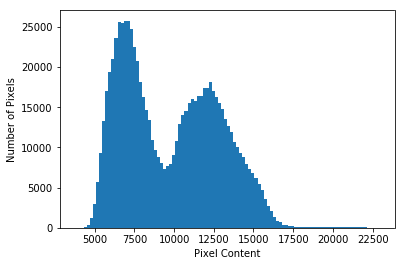

In [24]:
# Let's have a look how the pixel contents are distributed
nbins = 100
# flatten means: we put our 2d array in a 1d array
histogram = plt.hist(image_data.flatten(), nbins)

plt.xlabel('Pixel Content')
plt.ylabel('Number of Pixels')

plt.show()

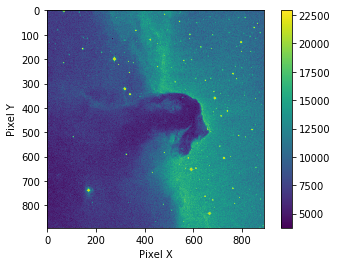

In [25]:
# A simple plot of the image
plt.imshow(image_data)

plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')

plt.colorbar()

plt.show()

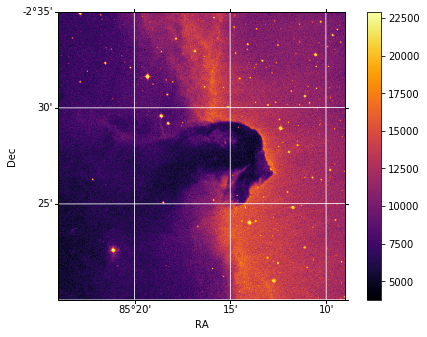

In [26]:
fig = plt.figure()

wcs = WCS(image_header)
ax = WCSAxes(fig, [0, 0, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(image_data, cmap=plt.cm.inferno)

plt.xlabel('RA')
plt.ylabel('Dec')

plt.grid(color='white', ls='solid')
plt.colorbar()

plt.show()

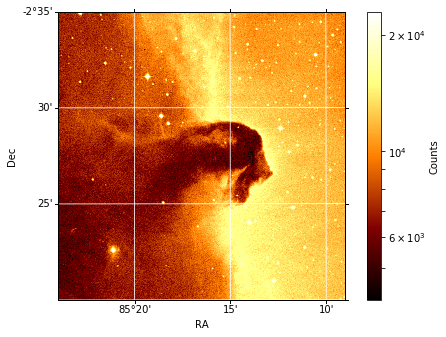

In [27]:
fig = plt.figure()

wcs = WCS(image_header)
ax = WCSAxes(fig, [0, 0, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(image_data, cmap=plt.cm.afmhot, norm=LogNorm())

plt.xlabel('RA')
plt.ylabel('Dec')

plt.grid(color='white', ls='solid')

cb = plt.colorbar()
plt.clim(1.1*np.min(image_data), np.max(image_data))
cb.set_label('Counts')

plt.show()

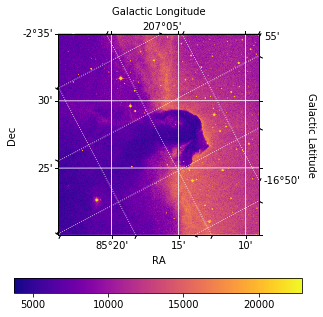

In [28]:
# Here we can specify the dimension and format of our figure
# That's often useful to fit images in a paper or talk etc.
fig = plt.figure(figsize=(4,4))

wcs = WCS(image_header)
ax = WCSAxes(fig, [0, 0, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(image_data, cmap=plt.cm.plasma)

plt.xlabel('RA')
plt.ylabel('Dec')

plt.grid(color='white', ls='solid')

overlay = ax.get_coords_overlay('galactic')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Galactic Longitude')
overlay[1].set_axislabel('Galactic Latitude')

# If we use the colorbar like this, it will overlap with our new axis
# Furthermore, we specify the ticks of the colorbar
#plt.colorbar(ticks=[5000, 10000, 15000, 20000])

# Therefore, the anchor commad is moving the colorbar horizontally. 
#plt.colorbar(ticks=[5000, 10000, 15000, 20000], anchor=(1.0,0.0))

# Another alternative is to put the colorbar below the plot
# You may want to adapt: fig = plt.figure(figsize=(4,4))
plt.colorbar(ticks=[5000, 10000, 15000, 20000], orientation='horizontal')


plt.show()

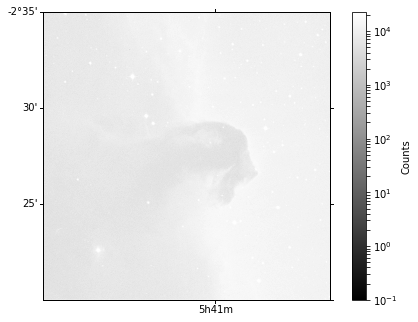

In [29]:
fig = plt.figure()

wcs = WCS(image_header)
ax = WCSAxes(fig, [0, 0, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.imshow(image_data, cmap=cm.gray, norm=LogNorm(), rasterized=True)

ra = ax.coords['ra']
dec = ax.coords['dec']
    
ra.set_major_formatter('hh:mm')
dec.set_major_formatter('dd:mm')
    
cb = plt.colorbar()
plt.clim(0.1,np.max(image_data))
cb.set_label('Counts')

plt.show()